In [83]:
import numpy as np

#def predict(w, inputs):
#    summation = np.dot(inputs, w)
#   if summation > 0:
#        activation = 1
#    else:
#        activation = 0
#    return activation

class Forgetron(object):
    
    # Constructor del Perceptrón. 
    #   Recibe como parámetro la cantidad de columnas "no_of_inputs" del dataset de entrenamiento.
    
    def __init__(self, no_of_inputs, iterations=1, learning_rate=0.5, output=[], acc=[]):
      self.iterations = iterations
      self.learning_rate = learning_rate
      self.weights = np.zeros(no_of_inputs)
      self.output = output
      self.acc = list()
           
    # Función de predicción. 
    #   Recibe como parámetro el dataset(inputs) y el vector de soluciones(labels).
    #   Retorna el valor de salida 0 ó 1, segun la sumatoria de Y[k]*X[i]X[k]
    #   Además, registra dicho valor de salida en una lista de outputs.
    
    def predict(self, inputs, i, I,labels):
        comb=0
        for k in I:   
            comb += labels[k] * np.dot(inputs[i], inputs[k])
        if comb >= 0:
            #self.output.append(1)
            return 1
        else:
            #self.output.append(0)
            return 0
            #self.output.append(prediction)
            
    def predict2(self, inputs, i):
        comb = np.dot(inputs, self.weights)
        if comb > 0:
            prediction = 1
        else:
            prediction = 0
        self.output.append(prediction)
            
    # Función de entrenamiento. 
    #   Recibe como parámetro la data de entrenamiento y los resultados esperados para cada instancia del conjunto.
    #   No tiene retorno. Su implementación es utilizada para actualizar el vector de pesos tras cada instancia
    #   i del dataset. Asimismo, se calcula el accuracy del modelo tras cada una de éstas y se registra en una lista.
    
    def train(self, training_inputs, labels,K):
        I=[]
        n=0
        for i in range(self.iterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(training_inputs, n,I,labels)
                self.predict2(inputs,n)
                if label!=prediction:
                    if len(I)>K:
                        #print(I)
                        I.pop(0)
                    I.append(n)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.acc.append(accuracy_score(labels[0:len(self.output)], self.output, normalize=True))
                n=n+1
                
        
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from time import time

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123456)

y_trained = []
for i in y_train:
    y_trained.append(i)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(len(X_train)) ] #add columns of 1's if you want

p = Forgetron(len(X_train[0]))
start_time=time()
p.train(X_train, y_trained,10)
elapsed_time=time()-start_time
print("Tiempo de ejecución: %10f segundos" %elapsed_time)

print(accuracy_score(y_trained, p.output, normalize=True))



Tiempo de ejecución:   0.246958 segundos
0.9195979899497487


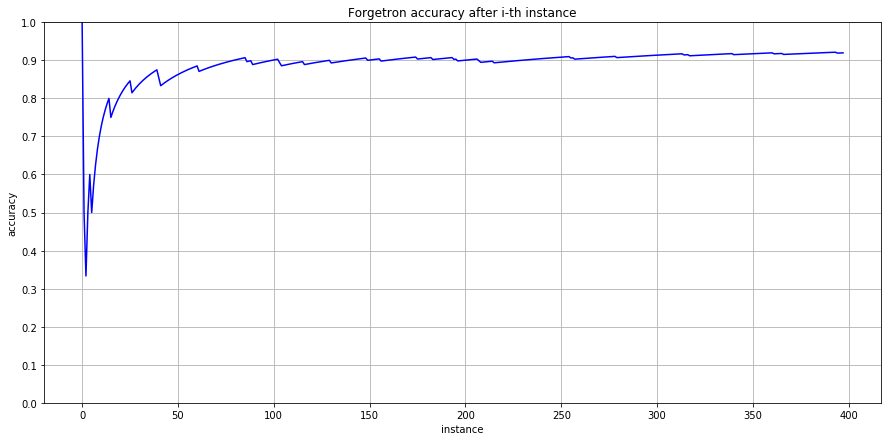

In [77]:
import matplotlib.pyplot as plt

x = [x for x in range(len(p.acc))]

plt.figure(figsize=(15, 7))

plt.ylim(0, 1)
plt.plot(x, p.acc, color='b')
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel('instance')
plt.ylabel('accuracy')
plt.title('Forgetron accuracy after i-th instance')
plt.grid(True)

plt.show()